XGBoost algo to predict historical BTC price action

In [134]:
import yfinance as yf
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [116]:
# Collect historical BTC data
btc_ticker = yf.Ticker("BTC-USD")
btc = btc_ticker.history(period="max")
btc.index = pd.to_datetime(btc.index)

In [117]:
# Ensure the data is sorted by date
btc = btc.sort_index()

In [118]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-31 00:00:00+00:00,34500.078125,34719.253906,34083.308594,34667.781250,15758270810,0.0,0.0
2023-11-01 00:00:00+00:00,34657.273438,35527.929688,34170.691406,35437.253906,22446272005,0.0,0.0
2023-11-02 00:00:00+00:00,35441.578125,35919.843750,34401.574219,34938.242188,20998158544,0.0,0.0


<Axes: xlabel='Date'>

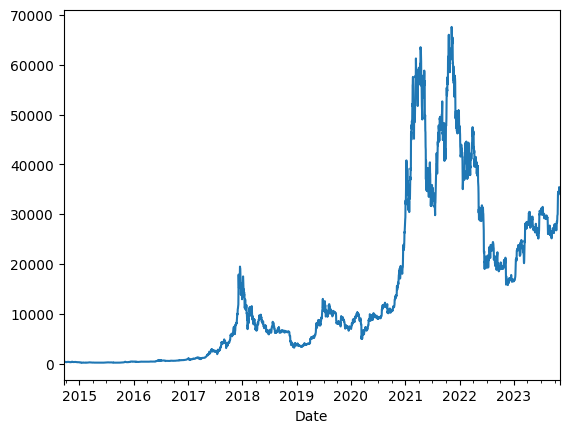

In [119]:
btc['Close'].plot()

In [120]:
# Keep the relevant columns
btc = btc[["Open", "High", "Low", "Close", "Volume"]]

In [121]:
# Split the data into training and testing sets
X = btc.drop(columns=["Close"])
y = btc['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
# Create an XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [130]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):")
print(mse)

Mean Squared Error (MSE):
224691.9763314401


In [125]:
accuracy = model.score(X_test,y_test)
print("Accuracy:")
print(accuracy)

Accuracy:
0.9991615936159843


99% Accurate

In [126]:
# Create a DataFrame to store the actual and predicted prices
results = pd.DataFrame({'Date': X_test.index, 'Actual': y_test, 'Predicted': y_pred})
results

,Date,Actual,Predicted
Date,,,
2015-08-04 00:00:00+00:00,2015-08-04 00:00:00+00:00,285.217987,293.494385
2023-03-08 00:00:00+00:00,2023-03-08 00:00:00+00:00,21718.080078,22023.425781
2016-09-13 00:00:00+00:00,2016-09-13 00:00:00+00:00,609.241028,620.198486
2018-05-13 00:00:00+00:00,2018-05-13 00:00:00+00:00,8723.940430,8677.411133
2019-01-03 00:00:00+00:00,2019-01-03 00:00:00+00:00,3836.741211,3824.188965
...,...,...,...
2023-08-13 00:00:00+00:00,2023-08-13 00:00:00+00:00,29282.914062,29259.300781
2018-10-25 00:00:00+00:00,2018-10-25 00:00:00+00:00,6476.290039,6486.986328
2018-09-12 00:00:00+00:00,2018-09-12 00:00:00+00:00,6351.799805,6352.531738


In [127]:
results.set_index('Date', inplace=True)
results

,Actual,Predicted
Date,,
2015-08-04 00:00:00+00:00,285.217987,293.494385
2023-03-08 00:00:00+00:00,21718.080078,22023.425781
2016-09-13 00:00:00+00:00,609.241028,620.198486
2018-05-13 00:00:00+00:00,8723.940430,8677.411133
2019-01-03 00:00:00+00:00,3836.741211,3824.188965
...,...,...
2023-08-13 00:00:00+00:00,29282.914062,29259.300781
2018-10-25 00:00:00+00:00,6476.290039,6486.986328
2018-09-12 00:00:00+00:00,6351.799805,6352.531738


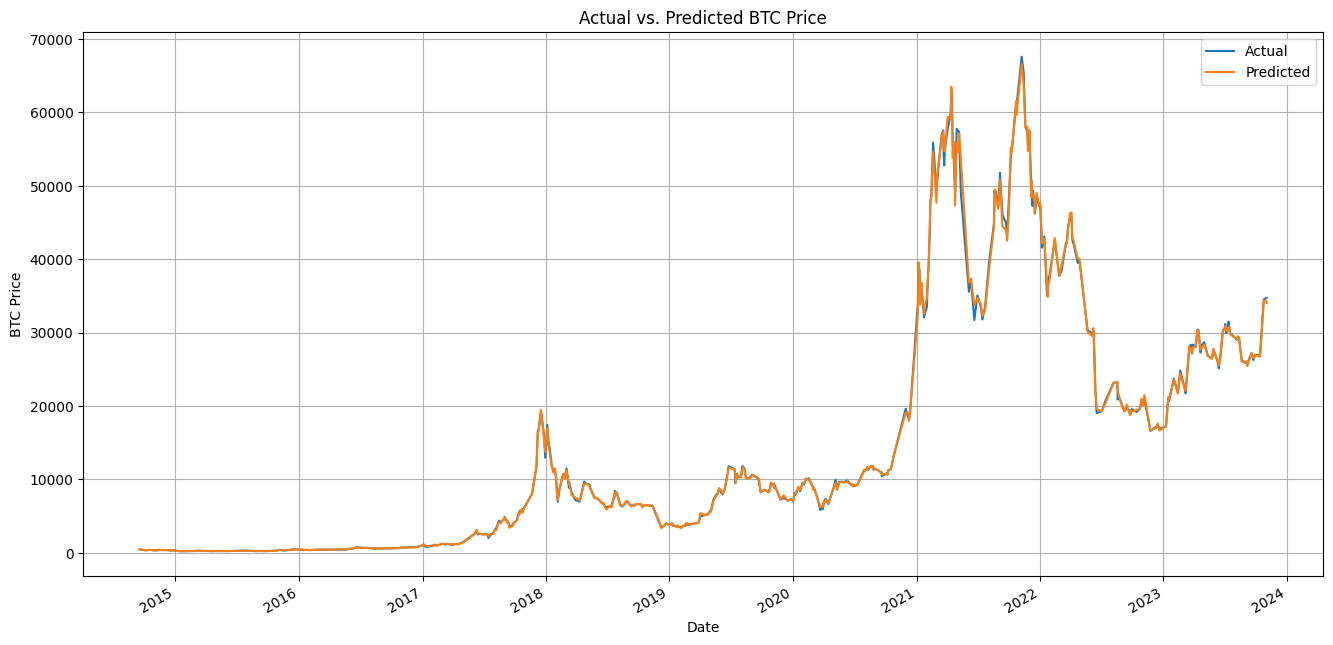

In [133]:
# Plot the actual and predicted prices using pandas
results.plot(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Actual vs. Predicted BTC Price')
plt.grid(True)
plt.show()